In [1]:
pip install tensorflow pandas numpy matplotlib scikit-learn


   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.8/385.2 MB 2.1 MB/s eta 0:03:04
   ---------------------------------------- 1.3/385.2 MB 2.3 MB/s eta 0:02:46
   ---------------------------------------- 1.8/385.2 MB 2.3 MB/s eta 0:02:44
   ---------------------------------------- 2.4/385.2 MB 2.2 MB/s eta 0:02:52
   ---------------------------------------- 2.6/385.2 MB 2.2 MB/s eta 0:02:53
   ---------------------------------------- 3.1/385.2 MB 2.2 MB/s eta 0:02:54
   ---------------------------------------- 3.7/385.2 MB 2.2 MB/s eta 0:02:52
   ---------------------------------------- 4.2/385.2 MB 2.2 MB/s eta 0:02:53
   ---------------------------------------- 4.7/385.2 MB 2.2 MB/s eta 0:02:51
    --------------------------------------- 5.0/385.2 MB 2.2 MB/s eta 0:02:54
    --------------------------------------- 5.5/385.2 MB 2.2 MB/s eta 0:02:55


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [1]:
pip show tensorflow


Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\Users\THARUKA\anaconda3\envs\Research_Project_env\Lib\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Load the data from the CSV file
data = pd.read_csv('LO_NL_Transient_P2.csv')

# Display the first few rows to understand the structure
print(data.head())


     Sample       Value
0  0.000000  194.367322
1  0.000039  199.704597
2  0.000078  198.815051
3  0.000117  196.550753
4  0.000156  194.852529


In [6]:
num_rows = data.shape[0]
print(f"Number of rows: {num_rows}")

Number of rows: 930717


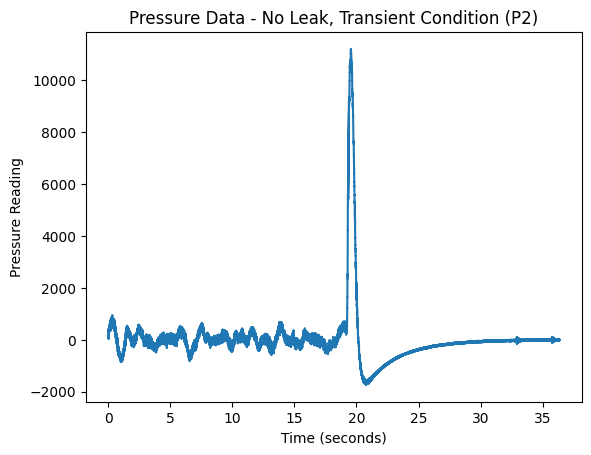

In [7]:
plt.plot(data['Sample'], data['Value'])
plt.title('Pressure Data - No Leak, Transient Condition (P2)')
plt.xlabel('Time (seconds)')
plt.ylabel('Pressure Reading')
plt.show()


In [8]:
# Define a function to create sequences
def create_sequences(data, window_size=50):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data['Value'][i:i+window_size].values)
        y.append(data['Value'][i+window_size])
    return np.array(X), np.array(y)

# Create sequences with a window size of 50
window_size = 50
X, y = create_sequences(data, window_size)
print(f"Feature shape: {X.shape}, Label shape: {y.shape}")


Feature shape: (930667, 50), Label shape: (930667,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
model = Sequential()
model.add(LSTM(64, input_shape=(window_size, 1), return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


c:\Users\THARUKA\anaconda3\envs\Research_Project_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [12]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
23267/23267 ━━━━━━━━━━━━━━━━━━━━ 502s 21ms/step - loss: 1026359.1875 - val_loss: 1296471.2500
Epoch 2/20
23267/23267 ━━━━━━━━━━━━━━━━━━━━ 504s 22ms/step - loss: 1309373.1250 - val_loss: 1052699.6250
Epoch 3/20
23267/23267 ━━━━━━━━━━━━━━━━━━━━ 495s 21ms/step - loss: 558515.0000 - val_loss: 646500.3750
Epoch 4/20
23267/23267 ━━━━━━━━━━━━━━━━━━━━ 492s 21ms/step - loss: 439766.3438 - val_loss: 827077.0625
Epoch 5/20
23267/23267 ━━━━━━━━━━━━━━━━━━━━ 492s 21ms/step - loss: 536458.8750 - val_loss: 708980.2500
Epoch 6/20
23267/23267 ━━━━━━━━━━━━━━━━━━━━ 494s 21ms/step - loss: 664574.5625 - val_loss: 239577.3438
Epoch 7/20
23267/23267 ━━━━━━━━━━━━━━━━━━━━ 506s 22ms/step - loss: 396786.6250 - val_loss: 96180.2422
Epoch 8/20
23267/23267 ━━━━━━━━━━━━━━━━━━━━ 502s 22ms/step - loss: 318659.4062 - val_loss: 941339.6250
Epoch 9/20
23267/23267 ━━━━━━━━━━━━━━━━━━━━ 501s 22ms/step - loss: 388583.6875 - val_loss: 194022.2969
Epoch 10/20
23267/23267 ━━━━━━━━━━━━━━━━━━━━ 502s 22ms/step - loss: 49

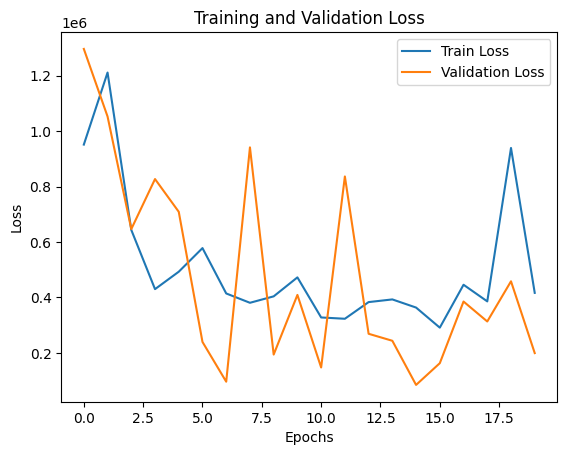

In [13]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
predictions = model.predict(X_test)


5817/5817 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step


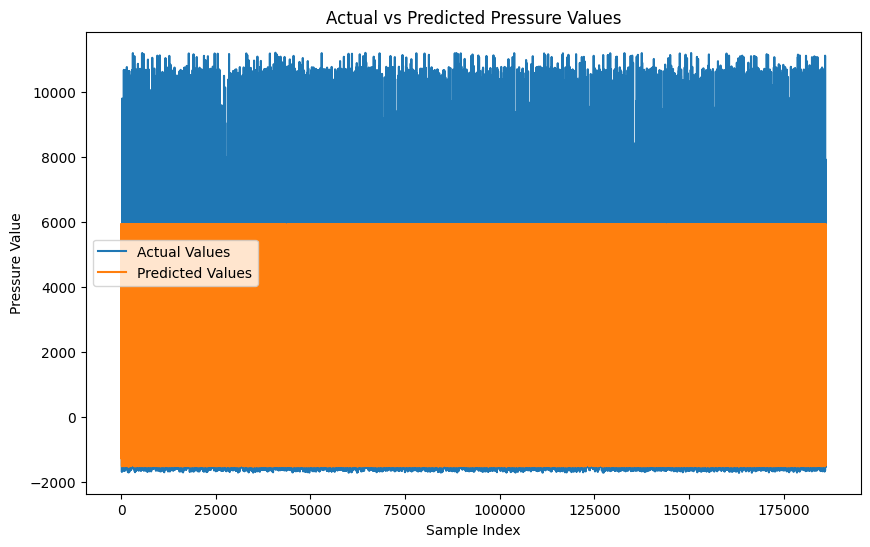

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Actual vs Predicted Pressure Values')
plt.xlabel('Sample Index')
plt.ylabel('Pressure Value')
plt.legend()
plt.show()
